In [4]:
import pandas as pd
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
len(df[df['bmi'].isna()==True])/len(df)

0.03368663594470046

In [6]:
len(df[df['smoking_status'].isna()==True])/len(df)

0.3062672811059908

In [7]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


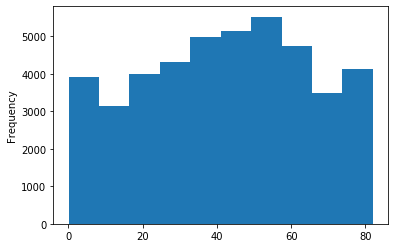

In [13]:
ax = df.age.plot.hist()
ax

In [14]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
df.shape

(43400, 12)

In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [17]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
len(df[df['gender']=='Other'])
#drop

11

In [19]:
df['work_type'].unique()
#one hot

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [20]:
df['smoking_status'].unique()
#one hot

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [21]:
import numpy as np
s = df.smoking_status.value_counts(normalize=True)
print(s)

never smoked       0.533181
formerly smoked    0.248871
smokes             0.217949
Name: smoking_status, dtype: float64


In [22]:
len(df[df['smoking_status'].isna()==True])

13292

In [23]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [24]:
rows_to_drop = df[df['smoking_status'].isnull()]
rows_to_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,0,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,1,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,0,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,0,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0


In [25]:
rows_to_drop.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,13292.000000,13292.000000,13292.000000,13292.000000,13292.000000,12866.000000,13292.000000
mean,35712.765272,29.267725,0.040099,0.028890,98.353068,25.330592,0.010909
std,20952.771744,24.852185,0.196200,0.167502,35.060757,8.024355,0.103878
min,8.000000,0.080000,0.000000,0.000000,55.000000,10.300000,0.000000
25%,17596.750000,7.000000,0.000000,0.000000,76.910000,19.000000,0.000000
50%,35324.500000,21.000000,0.000000,0.000000,90.050000,24.000000,0.000000
75%,53691.000000,50.000000,0.000000,0.000000,107.472500,29.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,279.660000,97.600000,1.000000


In [26]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,0,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,0,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [27]:
df = df[df['gender']!='Other']
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,0,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,0,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [28]:
len(df)

43389

In [29]:
df['ever_married'] = df['ever_married'].replace('No', 0)
df['ever_married'] = df['ever_married'].replace('Yes', 1)
df['Residence_type'] = df['Residence_type'].replace('Rural', 0)
df['Residence_type'] = df['Residence_type'].replace('Urban', 1)
#0 corresponds to rural, 1 corresponds to urban
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,children,0,95.12,18.0,NaN,0
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,Private,1,110.89,17.6,NaN,0
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0


In [30]:
pd.get_dummies(df['work_type'], prefix='work_type').head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [31]:
df = pd.concat([df, pd.get_dummies(df['work_type'], prefix='work_type')],axis=1)
df = df.drop(['work_type'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,3.0,0,0,0,0,95.12,18.0,NaN,0,0,0,0,0,1
1,1,58.0,1,0,1,1,87.96,39.2,never smoked,0,0,0,1,0,0
2,0,8.0,0,0,0,1,110.89,17.6,NaN,0,0,0,1,0,0
3,0,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,0,0,1,0,0
4,1,14.0,0,0,0,0,161.28,19.1,NaN,0,0,1,0,0,0


In [32]:
df.loc[df.age<18, ["smoking_status"]] = 'never smoked'

In [33]:
df[df['age']<18].head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,3.0,0,0,0,0,95.12,18.0,never smoked,0,0,0,0,0,1
2,0,8.0,0,0,0,1,110.89,17.6,never smoked,0,0,0,1,0,0
4,1,14.0,0,0,0,0,161.28,19.1,never smoked,0,0,1,0,0,0
33,0,3.0,0,0,0,1,73.74,16.0,never smoked,0,0,0,0,0,1
35,1,14.0,0,0,0,1,82.34,31.6,never smoked,0,1,0,0,0,0


In [34]:
print(s)

never smoked       0.533181
formerly smoked    0.248871
smokes             0.217949
Name: smoking_status, dtype: float64


In [35]:
missing = df['smoking_status'].isnull()
df.loc[missing,'smoking_status'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,3.0,0,0,0,0,95.12,18.0,never smoked,0,0,0,0,0,1
1,1,58.0,1,0,1,1,87.96,39.2,never smoked,0,0,0,1,0,0
2,0,8.0,0,0,0,1,110.89,17.6,never smoked,0,0,0,1,0,0
3,0,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,0,0,1,0,0
4,1,14.0,0,0,0,0,161.28,19.1,never smoked,0,0,1,0,0,0


In [36]:
s = df.smoking_status.value_counts(normalize=True)
print(s)

never smoked       0.606283
formerly smoked    0.208901
smokes             0.184816
Name: smoking_status, dtype: float64


In [37]:
df = pd.concat([df, pd.get_dummies(df['smoking_status'], prefix='smoking_status')],axis=1)
df = df.drop(['smoking_status'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,1,0,1,0
1,1,58.0,1,0,1,1,87.96,39.2,0,0,0,1,0,0,0,1,0
2,0,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,0,1,0
3,0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,1,0,0
4,1,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,0,0,1,0


In [38]:
copy = df.copy()
copy['bmi'] = copy['bmi'].fillna(copy['bmi'].median())
copy[copy['bmi'].isna()==True]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes


In [39]:
copy.to_csv('train_cleaned.csv', index = False)